# Census Income Project

# Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.1

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:



A single cell estimate of the population 16+ for each state.



Controls for Hispanic Origin by age and sex.



Controls by Race, age and sex.



We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



# Importing Required Libraries


In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler,power_transform,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score

import warnings 
warnings.filterwarnings('ignore')

# Laoding DataSet

In [6]:
df=pd.read_csv('Census Income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# EDA(Exploratory Data Analysis)

In [7]:
df.describe(include='all')    ###Describing the details of given data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
df.shape  # No. of rows and columns

(32560, 15)

The given data set we have 32560 no.of rows and 15 columns

In [9]:
df.info()     #To get columns,null values,datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.dtypes    #To get data types 

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# Finding null values


In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

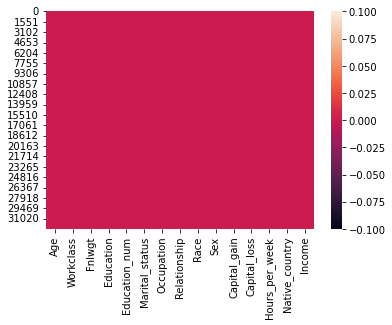

In [12]:
sns.heatmap(df.isnull())

Hence there is no null values


# Data Visualization


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

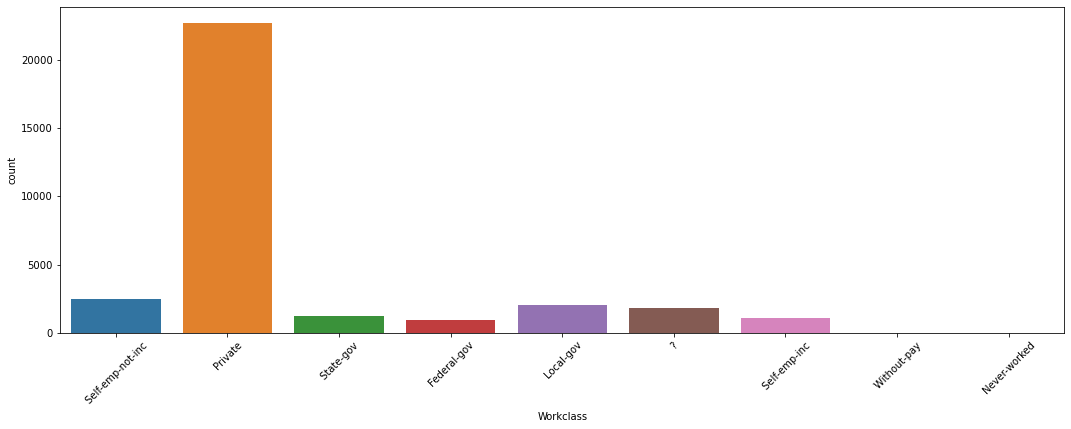

In [14]:
plt.figure(figsize=(18,6))
sns.countplot(df['Workclass'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

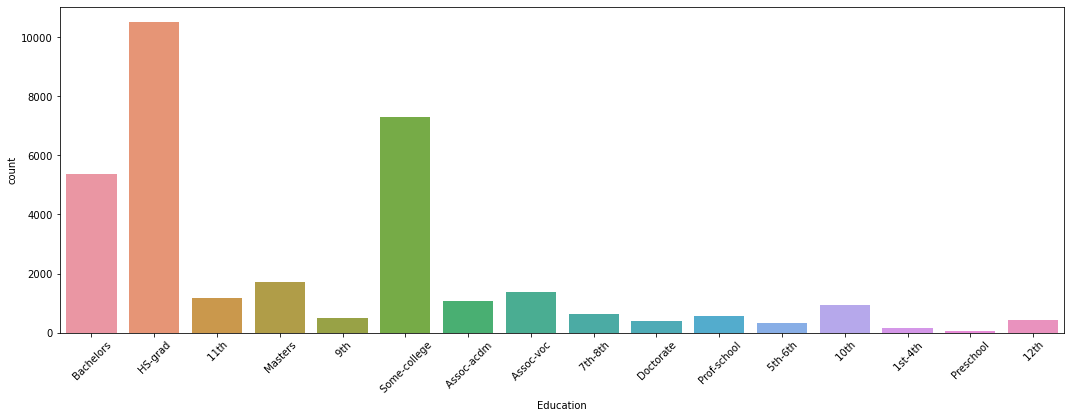

In [15]:
plt.figure(figsize=(18,6))
sns.countplot(df['Education'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

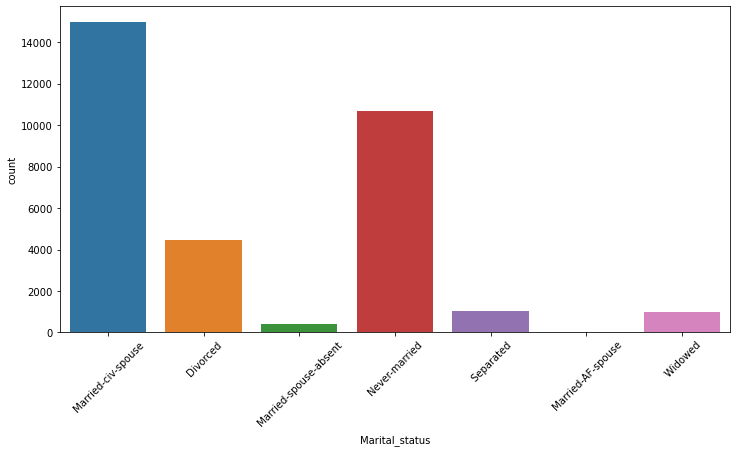

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(df['Marital_status'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

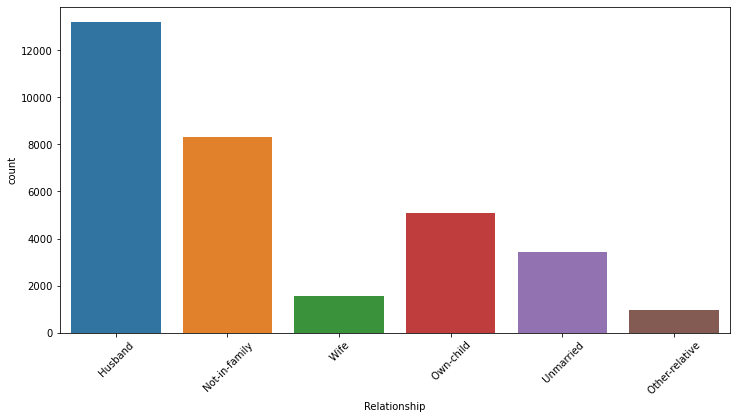

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(df['Relationship'])
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

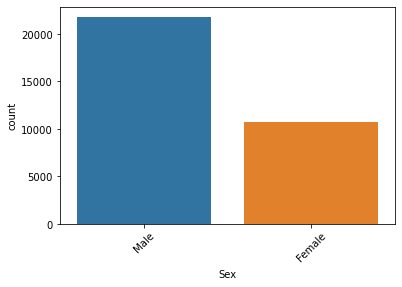

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(df['Sex'])
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')])

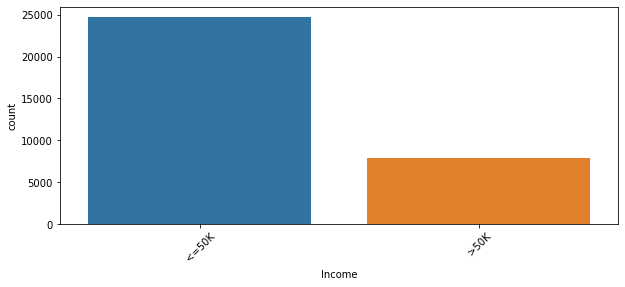

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(df['Income'])
plt.xticks(rotation=45)

In [20]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Data Cleaning

In [22]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+ ':' +str(df[column].unique()))   #Object type unique values
        print(str(column)+ ':' +str(df[column].nunique()))  #No. of object type unique values
        print(df[column].value_counts())                    #Counting unique values
        print('----------------------------------------------')

Workclass:[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Workclass:9
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
----------------------------------------------
Education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Education:16
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333

# Encoding Data using LabelEncoder

In [23]:
LE=LabelEncoder()

varib=['Workclass','Education','Occupation','Relationship','Race','Native_country','Sex','Marital_status','Income']
for i in varib:
    df[i]=LE.fit_transform(df[i])
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [24]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

# Correlation between features and labels

In [25]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


# Correlationship matrix

<AxesSubplot:>

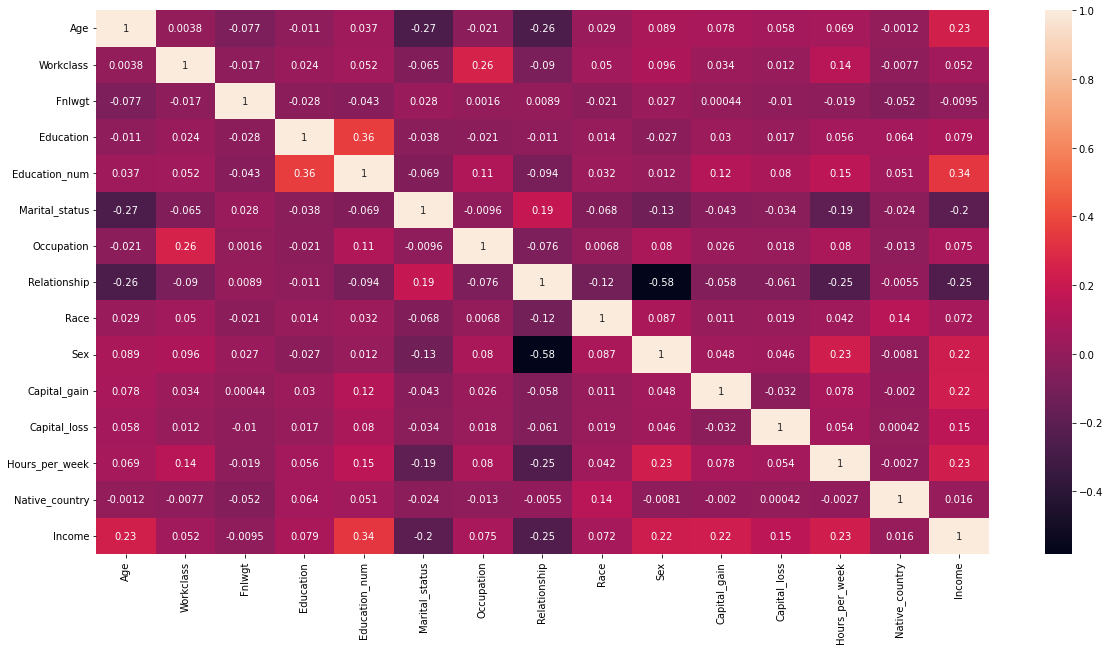

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Multicollinearity

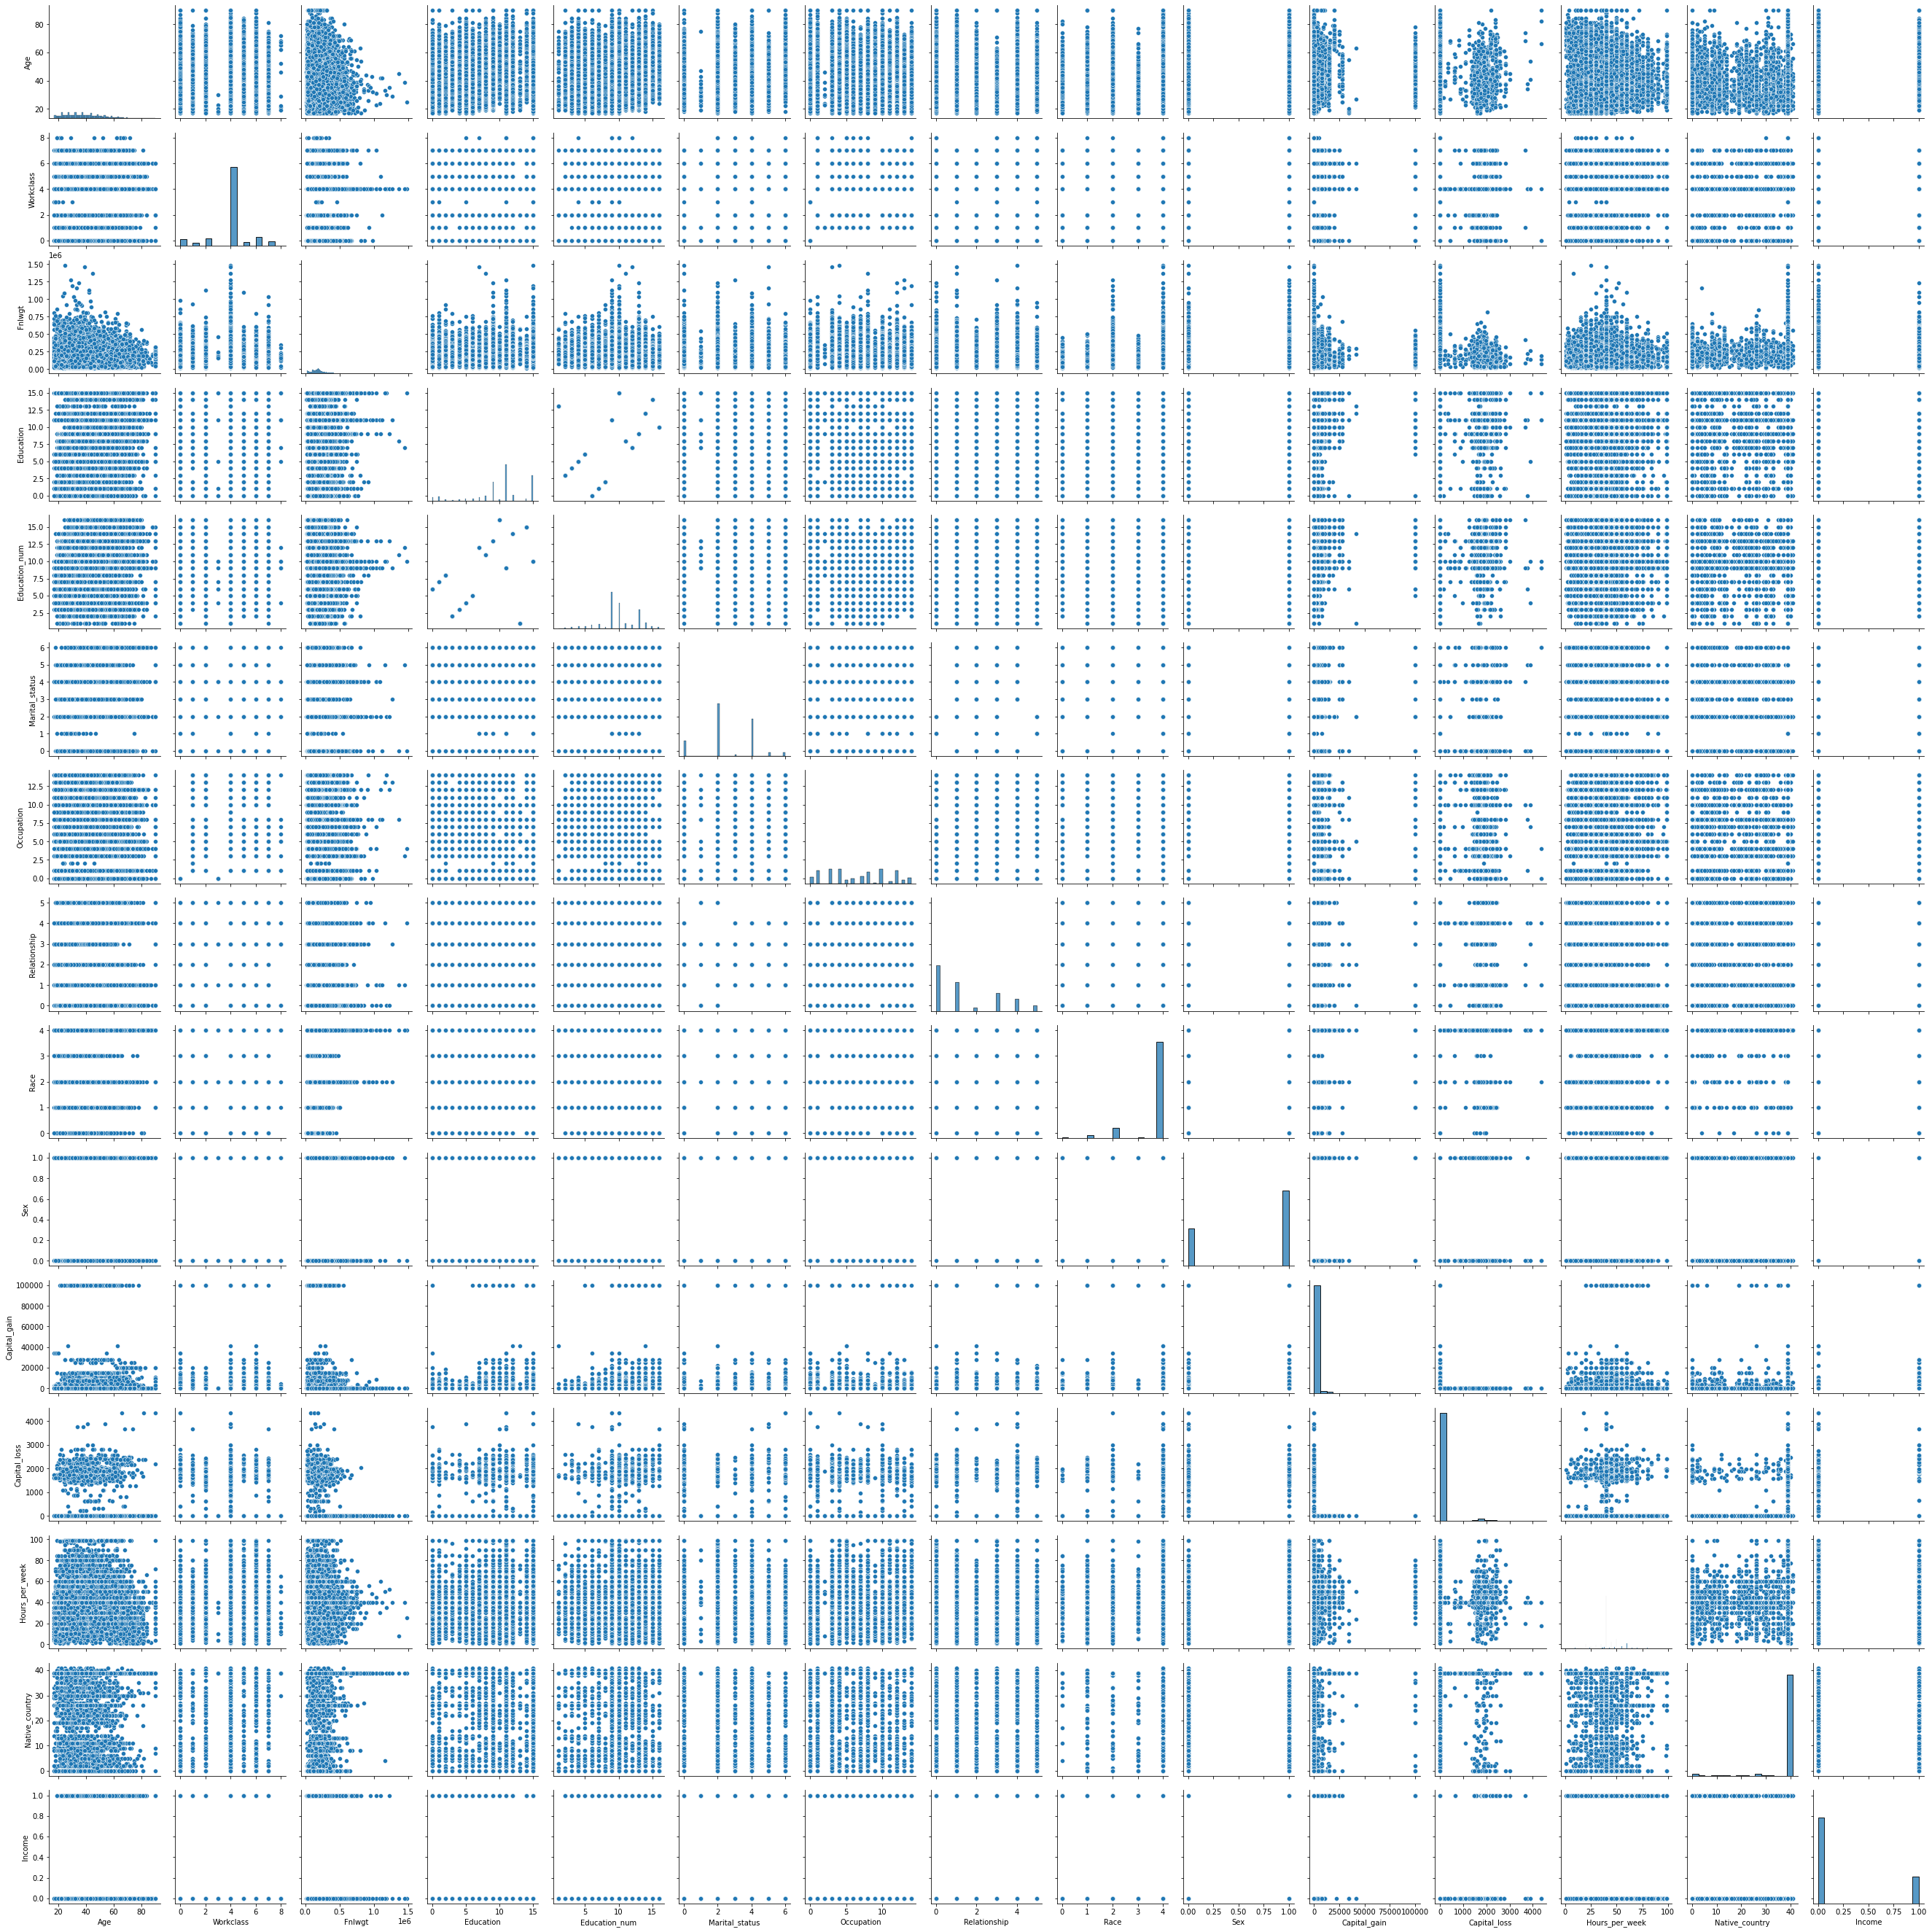

In [28]:
sns.pairplot(df)

# Distribution plot

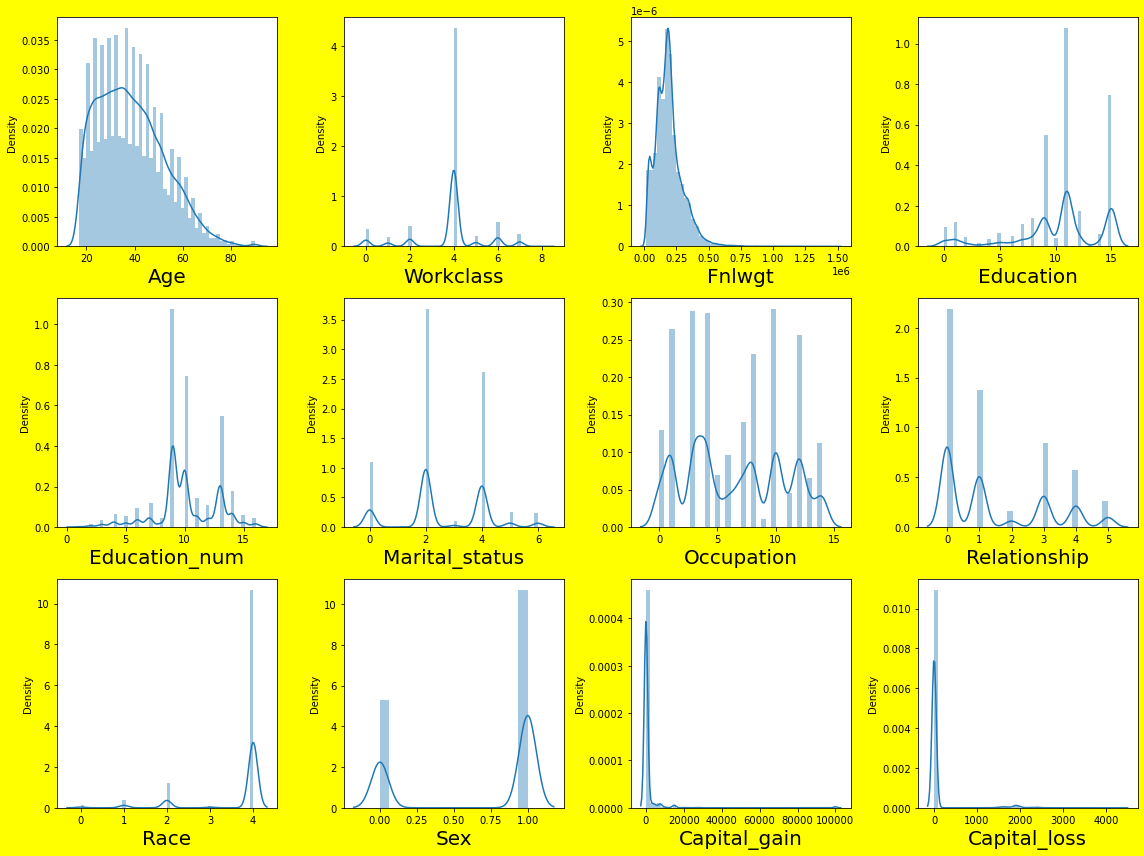

In [29]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
    plt.tight_layout()

# Finding Outliers

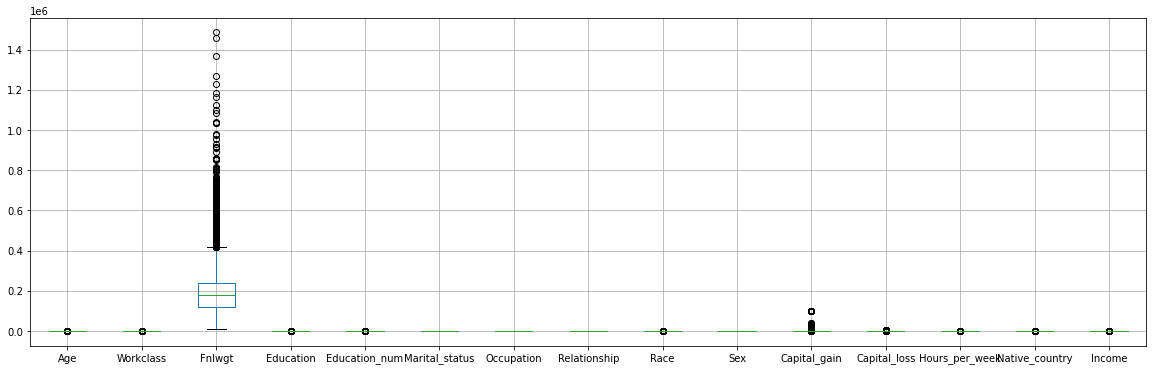

In [30]:
df.boxplot(figsize=(20,12))
plt.subplots_adjust(bottom=0.5)

In [31]:
(np.abs(zscore(df)<3)).all()

Age               False
Workclass          True
Fnlwgt            False
Education          True
Education_num      True
Marital_status     True
Occupation         True
Relationship       True
Race               True
Sex                True
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country     True
Income             True
dtype: bool

In [32]:
##Hence the data has a outliers which are not related and effets to the modeling


# Removing Outliers

In [33]:
scores = np.abs(zscore(df))
t = 3
np.where(scores<3)

(array([    0,     0,     0, ..., 32559, 32559, 32559], dtype=int64),
 array([ 0,  1,  2, ..., 12, 13, 14], dtype=int64))

In [34]:
new_df = df[(scores<3).all(axis=1)]
print(df.shape)
print(new_df.shape)

(32560, 15)
(27417, 15)


Hence there are many data removed from the main data(32560-27417=5233)


# Scatter realtionship between features and labels


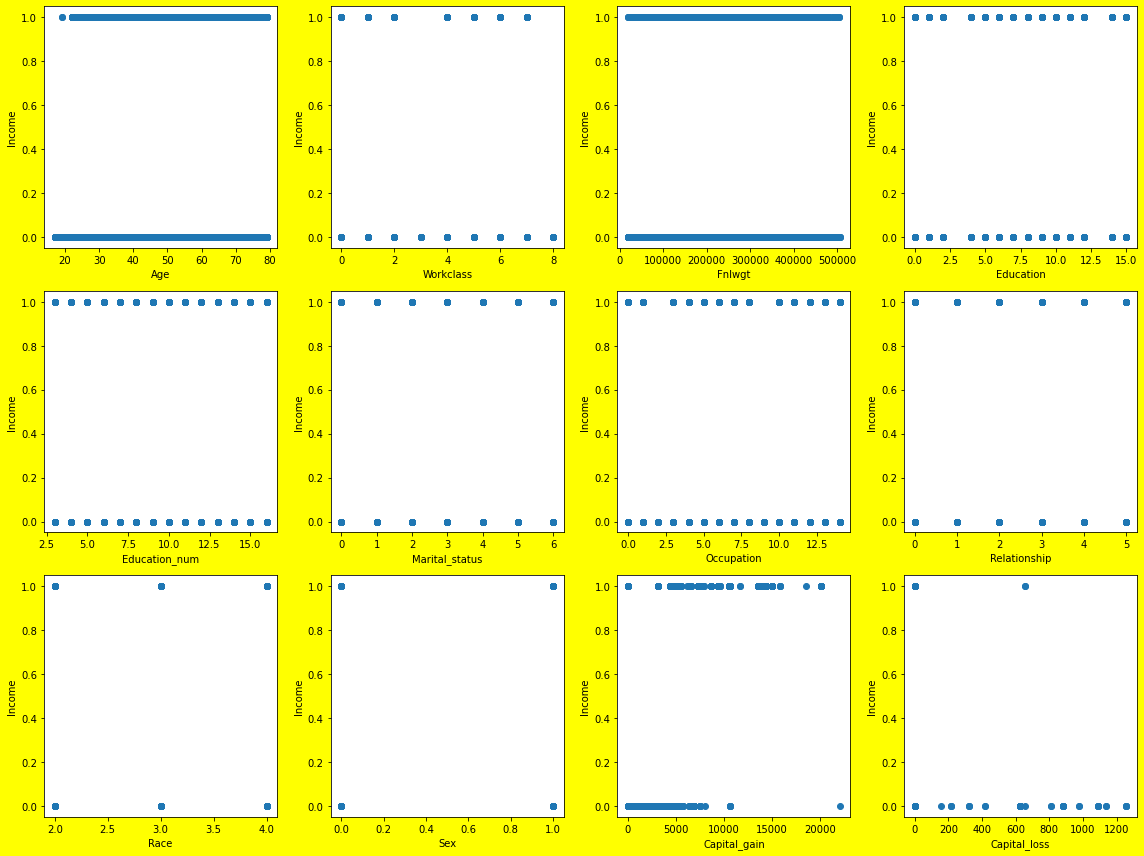

In [35]:
plt.figure(figsize=(16,12),facecolor='yellow')
plotnumber=1
for column in new_df:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(new_df[column],new_df['Income'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Income',fontsize=10)
        
        plotnumber+=1
    plt.tight_layout()

# Finding skewness


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

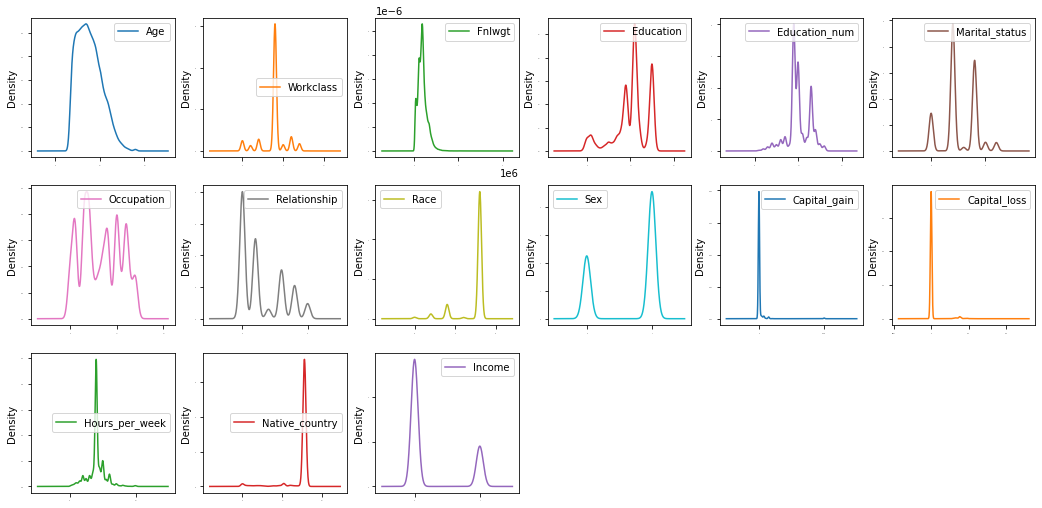

In [36]:
df.plot(kind='density',subplots=True,layout=(6,6),sharex=False,figsize=(18,18),fontsize=1,legend=True)


From above plot we have found there is many left and right skewed data


In [37]:
new_df.skew()


Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
Income             1.324919
dtype: float64

In [38]:
x=new_df.drop('Income',axis=True)
y=new_df['Income']
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [39]:
y

0        0
1        0
2        0
4        0
5        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 27417, dtype: int32

In [40]:
x.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675
dtype: float64

# Removing skewness


In [42]:
x_new=np.cbrt(x[x.columns])
x_new.skew()

Age                0.060920
Workclass         -2.947758
Fnlwgt            -0.383813
Education         -2.824206
Education_num     -0.912377
Marital_status    -1.612543
Occupation        -1.263077
Relationship      -0.135567
Race              -2.603441
Sex               -0.684115
Capital_gain       3.369433
Capital_loss      25.462533
Hours_per_week    -1.531517
Native_country    -5.855769
dtype: float64

# Pre-Processing model


In [43]:
x_new=power_transform(x_new)
x_new

array([[ 0.9234732 ,  1.56785462, -1.12445659, ..., -0.04054646,
        -2.21229097,  0.17180049],
       [ 0.12715559,  0.05225775,  0.41283226, ..., -0.04054646,
        -0.03887159,  0.17180049],
       [ 1.09856834,  0.05225775,  0.5929524 , ..., -0.04054646,
        -0.03887159,  0.17180049],
       ...,
       [ 1.37372238,  0.05225775, -0.24864178, ..., -0.04054646,
        -0.03887159,  0.17180049],
       [-1.32610856,  0.05225775,  0.27448415, ..., -0.04054646,
        -1.71352776,  0.17180049],
       [ 1.04109338,  0.78954291,  1.06329307, ..., -0.04054646,
        -0.03887159,  0.17180049]])

# Scaling Data


In [44]:
std=StandardScaler()
x_scaled=pd.DataFrame(std.fit_transform(x_new),columns=x.columns)
x_scaled

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.923473,1.567855,-1.124457,-0.443710,1.238517,-0.271550,-0.451301,-1.181448,0.347164,0.714839,-0.297044,-0.040546,-2.212291,0.171800
1,0.127156,0.052258,0.412832,0.106569,-0.459957,-1.942508,0.009853,0.371602,0.347164,0.714839,-0.297044,-0.040546,-0.038872,0.171800
2,1.098568,0.052258,0.592952,-2.183874,-1.258867,-0.271550,0.009853,-1.181448,-2.883891,0.714839,-0.297044,-0.040546,-0.038872,0.171800
3,0.052217,0.052258,1.034941,0.396437,1.682552,-0.271550,-0.451301,1.345660,0.347164,-1.398916,-0.297044,-0.040546,-0.038872,0.171800
4,0.863264,0.052258,-0.156480,-1.189985,-2.020893,0.312388,0.427473,0.371602,-2.883891,-1.398916,-0.297044,-0.040546,-2.005002,-4.332839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27412,-0.801527,0.052258,0.797874,-0.952360,0.802009,-0.271550,1.363886,1.345660,0.347164,-1.398916,-0.297044,-0.040546,-0.220834,0.171800
27413,0.272492,0.052258,-0.220975,0.106569,-0.459957,-0.271550,0.222899,-1.181448,0.347164,0.714839,-0.297044,-0.040546,-0.038872,0.171800
27414,1.373722,0.052258,-0.248642,0.106569,-0.459957,1.940911,-1.338663,1.182822,0.347164,-1.398916,-0.297044,-0.040546,-0.038872,0.171800
27415,-1.326109,0.052258,0.274484,0.106569,-0.459957,0.869572,-1.338663,0.987335,0.347164,0.714839,-0.297044,-0.040546,-1.713528,0.171800


There are 27417 rows of data we have,so we need to apply PCA method


# Applying PCA


In [45]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 14)
x_pca = pca.fit_transform(x_scaled)
explained_variance = pca.explained_variance_ratio_

# Creating Model


# Finding Best Random state


In [46]:
bestrandom=0
max_score=0
#models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    print('Accuracy score is ',acc,'Random state',i)
    
    if acc>max_score:
        max_score=acc
        bestrandom=i
            
        print('Accuracy',max_score,'Random State',i)

Accuracy score is  0.8327862873814734 Random state 0
Accuracy 0.8327862873814734 Random State 0
Accuracy score is  0.8327862873814734 Random state 1
Accuracy score is  0.836797957695113 Random state 2
Accuracy 0.836797957695113 Random State 2
Accuracy score is  0.8313274981765135 Random state 3
Accuracy score is  0.8291393143690736 Random state 4
Accuracy score is  0.8298687089715536 Random state 5
Accuracy score is  0.8291393143690736 Random state 6
Accuracy score is  0.8336980306345733 Random state 7
Accuracy score is  0.8300510576221736 Random state 8
Accuracy score is  0.8335156819839533 Random state 9
Accuracy score is  0.8269511305616338 Random state 10
Accuracy score is  0.8282275711159738 Random state 11
Accuracy score is  0.8291393143690736 Random state 12
Accuracy score is  0.8287746170678337 Random state 13
Accuracy score is  0.8280452224653537 Random state 14
Accuracy score is  0.8271334792122538 Random state 15
Accuracy score is  0.8258570386579139 Random state 16
Accuracy

In [47]:
print('Best Accuracy is',max_score,'Best Random State',bestrandom)


Best Accuracy is 0.8446389496717724 Best Random State 403


# train_test_split method


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.20,random_state=403)
print(x_train.shape)
print(y_train.shape)

(21933, 14)
(21933,)


# Building Model


In [49]:
from sklearn.metrics import confusion_matrix,classification_report
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.20,random_state=403)
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    model.fit(x_train,y_train)
    predlr=model.predict(x_test)
    print("Model Name",model)
    print("Accuracy",accuracy_score(y_test,predlr)*100)
    print(confusion_matrix(y_test,predlr))
    print(classification_report(y_test,predlr))
    print('----------------------------------------------------------')

Model Name LogisticRegression()
Accuracy 84.46389496717724
[[4052  253]
 [ 599  580]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4305
           1       0.70      0.49      0.58      1179

    accuracy                           0.84      5484
   macro avg       0.78      0.72      0.74      5484
weighted avg       0.83      0.84      0.83      5484

----------------------------------------------------------
Model Name KNeighborsClassifier()
Accuracy 83.24215900802334
[[3864  441]
 [ 478  701]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4305
           1       0.61      0.59      0.60      1179

    accuracy                           0.83      5484
   macro avg       0.75      0.75      0.75      5484
weighted avg       0.83      0.83      0.83      5484

----------------------------------------------------------
Model Name DecisionTreeClassifier()
Accuracy 78.063457

The SVC model is giving best accuracy score of 84.8%


# Cross validation Score


In [50]:
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),AdaBoostClassifier()]
for model in models:
    scr=cross_val_score(model,x_pca,y,cv=5)
    print("Model Name :",model)
    print("Cross validation score is: ", scr.mean()*100)
    print("Mean score :", (scr.mean())*100)
    print("STD :", scr.std()*100)
    print('---------------------------------------')

Model Name : LogisticRegression()
Cross validation score is:  83.08350670256836
Mean score : 83.08350670256836
STD : 0.2377443231439192
---------------------------------------
Model Name : KNeighborsClassifier()
Cross validation score is:  82.4014422670803
Mean score : 82.4014422670803
STD : 0.36319630000207365
---------------------------------------
Model Name : DecisionTreeClassifier()
Cross validation score is:  78.02096607071283
Mean score : 78.02096607071283
STD : 0.526712823808709
---------------------------------------
Model Name : RandomForestClassifier()
Cross validation score is:  83.40448289674086
Mean score : 83.40448289674086
STD : 0.34147808771649446
---------------------------------------
Model Name : SVC()
Cross validation score is:  83.82391472455211
Mean score : 83.82391472455211
STD : 0.2800685687082681
---------------------------------------
Model Name : AdaBoostClassifier()
Cross validation score is:  83.0360894019882
Mean score : 83.0360894019882
STD : 0.437865381

# HyperParameter Tuning using best GridSearchCV method


In [51]:
param={'min_samples_leaf':range(2,10),'min_samples_split':range(3,10),'max_depth':range(1,5),
                                    "max_features" :["auto", "sqrt", "log2"]}

In [52]:
rfc=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rfc,
                        param_grid=param,
                        cv=5,
                        n_jobs=-1)     # Use all the cores in your system.For performance improvement.
grid_search.fit(x_train,y_train)
print(grid_search)
print("Best parameters :",grid_search.best_params_)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})
Best parameters : {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4}


In [53]:
rfc=RandomForestClassifier(max_depth=3,max_features='auto',min_samples_leaf=2,min_samples_split=9)
rfc.fit(x_train,y_train)
predlr=rfc.predict(x_test)
print("Model Name",rfc)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Model Name RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=9)
Accuracy 81.2180889861415
[[4252   53]
 [ 977  202]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      4305
           1       0.79      0.17      0.28      1179

    accuracy                           0.81      5484
   macro avg       0.80      0.58      0.59      5484
weighted avg       0.81      0.81      0.76      5484



# ROC Curve

Accuracy 84.81035740335521


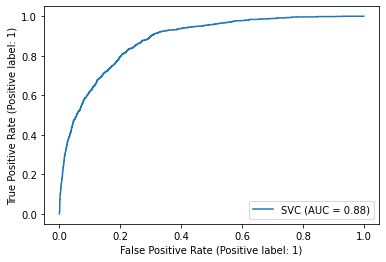

In [54]:
clf=SVC(random_state=403)
clf.fit(x_train,y_train)
predlr=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)

plot_roc_curve(clf, x_test, y_test) 
plt.show()

# Conclusion


Hence the SVC model is giving best accuracy score for random state 403 as 84.8% and 83% cross validation score,so this model is best fit for predicting output


# Saving Model


In [55]:
import pickle
filename = "Census_income.pkl"

with open(filename,"wb")as f:
    pickle.dump(clf,f)